## 주성분 분석 PCA (principal component analysis)
### 차원과 차원 축소
**차원 dimension**  
> 특성의 개수
  
**차원 축소 dimensionality reduction**
> 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법  


### 주성분 분석 소개
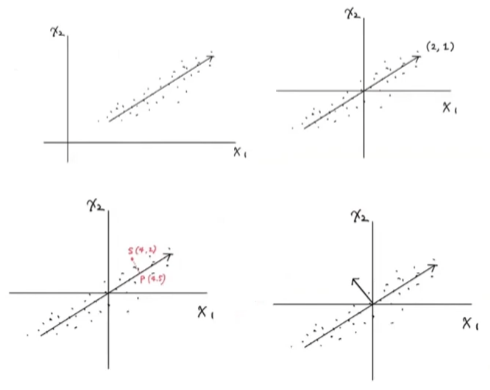

### PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-02-26 06:30:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-26 06:30:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-26 06:30:37--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # n_components: 주성분의 개수를 n개로 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape) # pca components_: PCA 클래스가 찾은 주성분이 저장되어 있음

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    
    rows = int(np.ceil(n/10))

    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

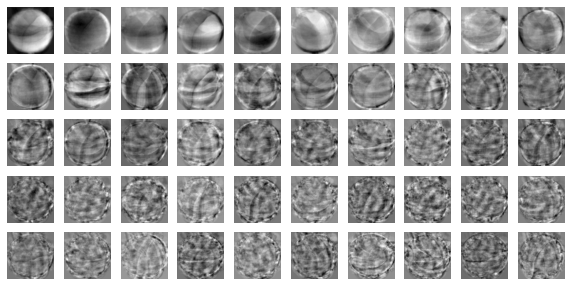

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d) # pca transform: 새로운 주성분으로 데이터 변환
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) # pca inverse_transform: 원본 데이터 재구성
print(fruits_inverse.shape)

(300, 10000)


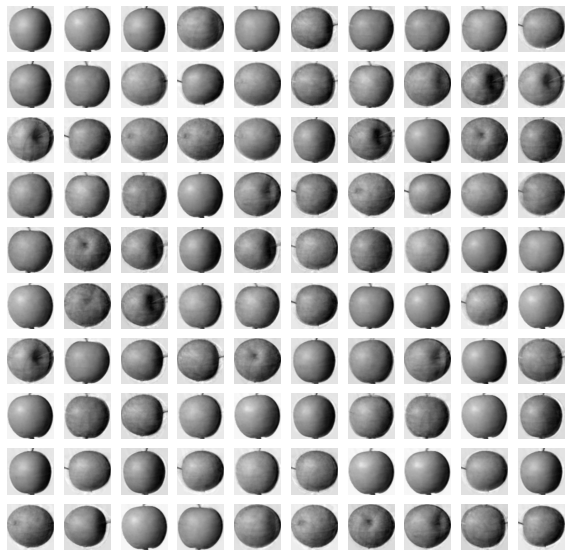

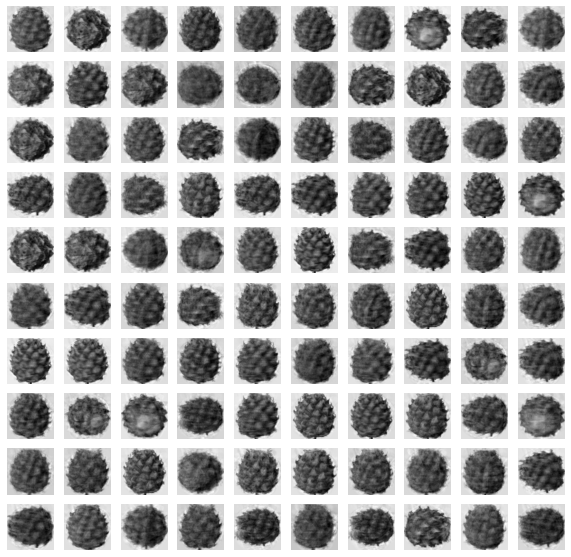

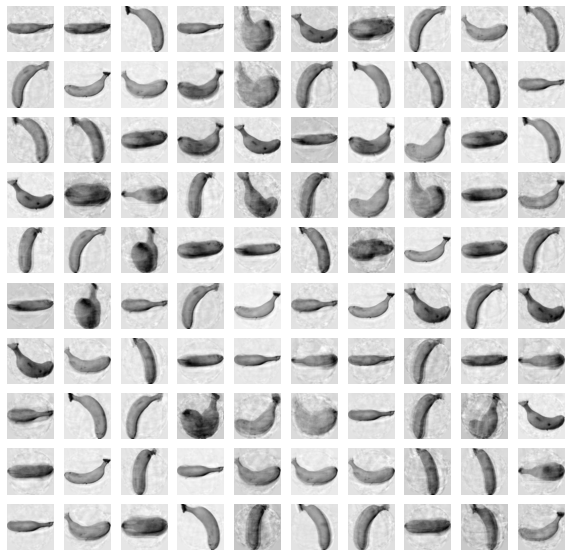

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

### 설명된 분산 explained variance
> 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215435561876621


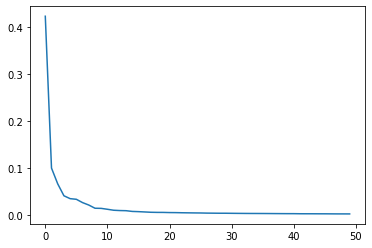

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) # 교차검증 점수
print(np.mean(scores['fit_time'])) # 교차검증하는데 걸린 시간

0.9966666666666667
1.7004053115844726


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.10826196670532226


In [ ]:
pca = PCA(n_components=0.5) # pca n_components: 설명된 분산의 0.5(50%)에 달하는 주성분을 찾도록 설정
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
# 2개의 특성으로 원본 데이터 분산의 50% 표현 가능
print(pca.n_components_) # pca n_components_: 주성분의 개수

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03566198348999024


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))
# ch06-2: (array([0, 1, 2], dtype=int32), array([111,  98,  91]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


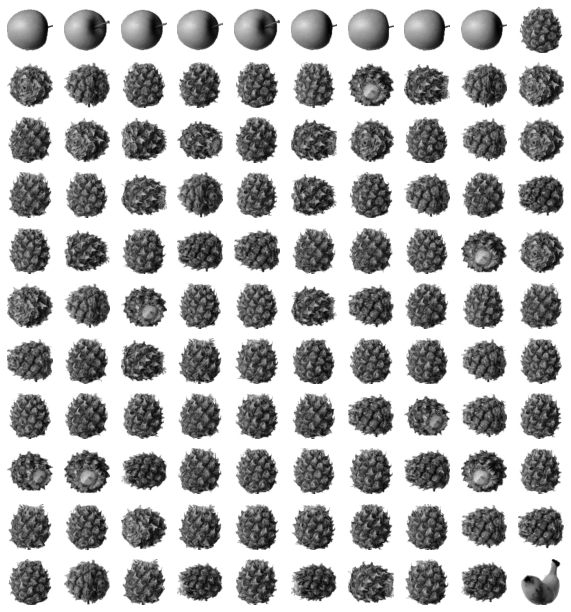

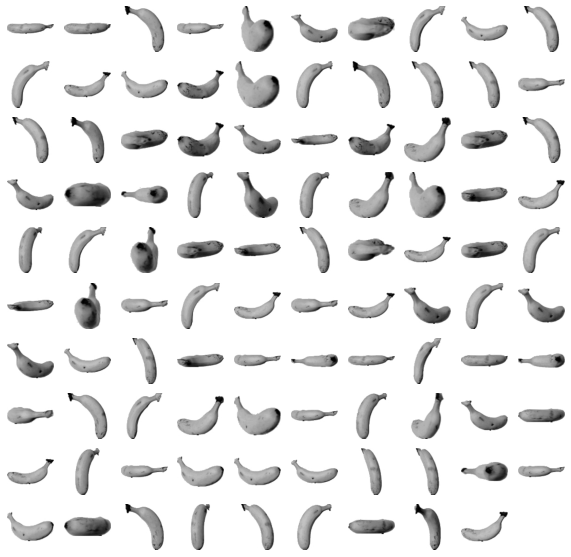

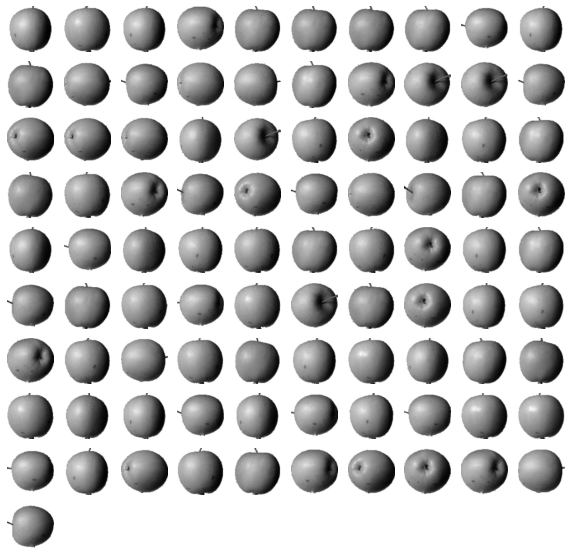

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

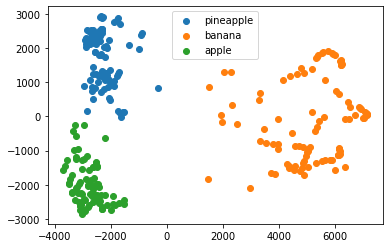

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()